<a href="https://colab.research.google.com/github/ksimhadr/learn/blob/master/PCA_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis
#### In ML, the data has high dimensionality --> Analysis is difficult
#### How to capture the relevant information
#### Process of reducing the dimensions of the data, Feature extraction.
#### Data has large spread along certain directions, Principal Directions.
#### Data can be projected along this direction.
#### Low complexity Processing
#### PCA determines these Principal directions, yields the principal components of the data.

#PCA Procedure
1.   Consider x1, x2, xN data
2.   Estimate the sample mean of the data. u_bar = 1/N * (Summ of xi over 1 to N
3.   Subtract the mean from each data --> Normalized the data/Center the data. Reduces the complexity.
4.   Covariance Estimate R = 1/N-1 (Summ of x,xT) --> captures the spread of the data




#### Use PCA to compress IRIS dataset 4 features to 2 features

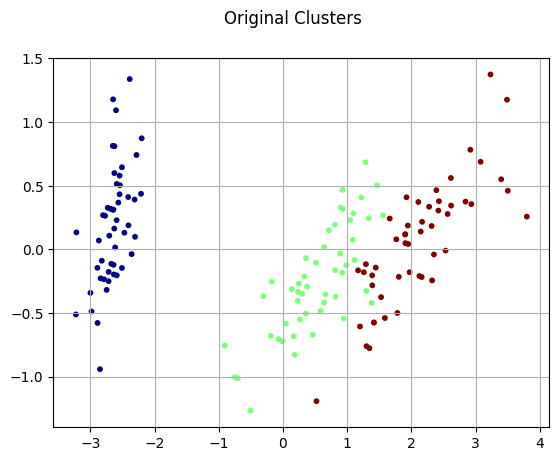

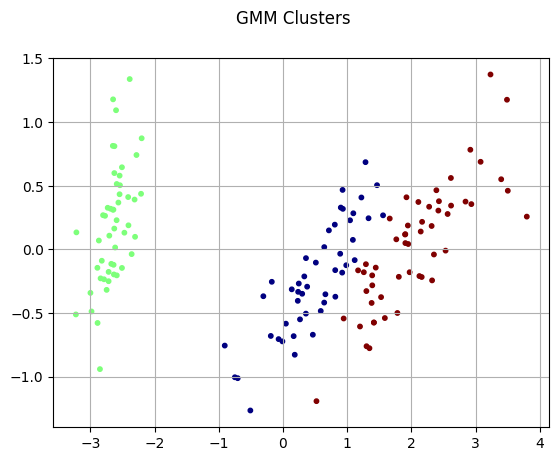

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix

irisset = datasets.load_iris()
X = irisset.data
Y = irisset.target

pca = PCA(n_components=2) #no. of principal components = 2
Xp = pca.fit(X).transform(X) #Fit & transform data;; .transform is projections to determine the principal component

plt.figure(1)
plt.scatter(Xp[:, 0], Xp[:, 1], c=Y, cmap='jet',s=10)
#Xp[:, 1] - scatter plot with original labels
plt.suptitle('Original Clusters')
plt.grid(1,which='both')
plt.axis('tight') #remove extra space in plot
plt.show()

GMM = GaussianMixture(n_components=3)
# Fit GMM to given data, PCA compressed data
GMM.fit(Xp)#Estimate GMM parameters - U, Sigma and pi
y_predG = GMM.predict(Xp) #Predict labels

plt.figure(2)
plt.scatter(Xp[:, 0], Xp[:, 1], c=y_predG, cmap='jet',s=10)
plt.suptitle('GMM Clusters')
plt.grid(1,which='both')
plt.axis('tight') #remove extra space in plot, shorten axis
plt.show()

#Clustering - all points should belongs to same cluster
#GMM works with PCA compressed data to yield clusters

#### Performance Metrics
#### How many points in each cluster misclassified

In [3]:
cmat = confusion_matrix(Y, y_predG)
print(cmat)

[[ 0 50  0]
 [47  0  3]
 [ 0  0 50]]
